In [1]:
# 모평균의 추정

In [1]:
### setup
library(RCurl) # = getForm()
library(jsonlite)


### functions
LOG = function(txt){
    write(txt, file="log.txt")
}
cData.get = function(key){
    return(cData$data[which(names(cData.keys) == key)])
}
top = function(arr, n=5){
    return(sort(arr, decreasing=T)[1:n])
}
fromTier = function(file){
    return(fromJSON(paste0('data/', tier, index, '/', file)))
}
fromName = function(file){
    return(fromJSON(paste0('data/', name, file)))    
}


### read assets
cData = fromJSON('data/championsData.json')
iData = fromJSON('data/itemsData.json')
rData = fromJSON('data/runesDataPatched.json')
## iData.items
iData.items = iData$data
## cData.keys to name
cData.keys = c()
for(champ in cData$data){
    cData.keys[champ$key] = champ$name
}
cData.names = c()
for(champ in cData$data){
    cData.names[champ$name] = champ$key
}

In [2]:
name = "김옥티/"

In [2]:
tier = "DIAMOND/"

In [4]:
### NAME
data.main = c()

summoner = fromName("summoner.json")
matchList = fromName('matchList.json')
stats = fromName('match_participants_stats.json')
participants = fromName('match_participants.json')
match = fromName("match.json")

champion = matchList$champion
duration = unlist(match$gameDuration)
role = data.frame(role = matchList$role, stringsAsFactors = F)
lane = data.frame(lane = matchList$lane, stringsAsFactors = F)

data = cbind(role, lane, champion, duration) #🥰

sIndex = unlist(sapply(participants, function(x) which(x$championId == champion[parent.frame()$i])))

# sIndex
# champion
# cData.keys['222']
# # 235: 세나, 단식 세나 시부랄것 생태계 교란종이야
# # BOTTOM은 서폿과 원딜이 혼재되어있어 제대로된 추정값을 얻기 힘듬

result = sapply(stats, function(games){
    c(
        win = games[[sIndex[parent.frame()$i]]]$win,
        kill = games[[sIndex[parent.frame()$i]]]$kills,
        death = games[[sIndex[parent.frame()$i]]]$deaths,
        assist = games[[sIndex[parent.frame()$i]]]$assists,
        cs = games[[sIndex[parent.frame()$i]]]$totalMinionsKilled,
        csJungle = games[[sIndex[parent.frame()$i]]]$neutralMinionsKilled,
        csEnemyJungle = games[[sIndex[parent.frame()$i]]]$neutralMinionsKilledEnemyJungle,
        boughtWards = games[[sIndex[parent.frame()$i]]]$visionWardsBoughtInGame,
#         games[[sIndex[parent.frame()$i]]]$sightWardsBoughtInGame
        wardsPlaced = games[[sIndex[parent.frame()$i]]]$wardsPlaced,
        wardsKilled = games[[sIndex[parent.frame()$i]]]$wardsKilled,
        visionScore = games[[sIndex[parent.frame()$i]]]$visionScore,
        timeCCingOthers = games[[sIndex[parent.frame()$i]]]$timeCCingOthers,
        perkMainStyle = games[[sIndex[parent.frame()$i]]]$perkPrimaryStyle,
        perkSubStyle = games[[sIndex[parent.frame()$i]]]$perkSubStyle,
        perk0 = games[[sIndex[parent.frame()$i]]]$perk0,
        perk1 = games[[sIndex[parent.frame()$i]]]$perk1,
        perk2 = games[[sIndex[parent.frame()$i]]]$perk2,
        perk3 = games[[sIndex[parent.frame()$i]]]$perk3,
        perk4 = games[[sIndex[parent.frame()$i]]]$perk4,
        perk5 = games[[sIndex[parent.frame()$i]]]$perk5,
        item0 = games[[sIndex[parent.frame()$i]]]$item0,
        item1 = games[[sIndex[parent.frame()$i]]]$item1,
        item2 = games[[sIndex[parent.frame()$i]]]$item2,
        item3 = games[[sIndex[parent.frame()$i]]]$item3,
        item4 = games[[sIndex[parent.frame()$i]]]$item4,
        item5 = games[[sIndex[parent.frame()$i]]]$item5,
        item6 = games[[sIndex[parent.frame()$i]]]$item6
    )
})

data = cbind(data, data.frame(t(result)))
data.main = data


ERROR: Error in paste0("data/", name, file): object 'name' not found


In [3]:
### TIER
updating = F
to.summoner = 200
is.exist = T
try({
    data.main = fromJSON(paste0("data/" ,tier, 'data_main.json'))    
    is.exist = F
}) 

if(updating || is.exist){
    data.main = c()
    for(index in 1:to.summoner){
        summoner = fromTier("summoner.json")
        matchList = fromTier('matchList.json')
        stats = fromTier('match_participants_stats.json')
        participants = fromTier('match_participants.json')
        match = fromTier("match.json")

        champions = parti
        champion = matchList$champion
        duration = unlist(match$gameDuration)
        role = data.frame(role = matchList$role, stringsAsFactors = F)
        lane = data.frame(lane = matchList$lane, stringsAsFactors = F)

        data = cbind(role, lane, champion, duration) #🥰

        sIndex = unlist(sapply(participants, function(x) which(x$championId == champion[parent.frame()$i])))

        result = sapply(stats, function(games){
            c(
                win = games[[sIndex[parent.frame()$i]]]$win,
                kill = games[[sIndex[parent.frame()$i]]]$kills,
                death = games[[sIndex[parent.frame()$i]]]$deaths,
                assist = games[[sIndex[parent.frame()$i]]]$assists,
                cs = games[[sIndex[parent.frame()$i]]]$totalMinionsKilled,
                csJungle = games[[sIndex[parent.frame()$i]]]$neutralMinionsKilled,
                csEnemyJungle = games[[sIndex[parent.frame()$i]]]$neutralMinionsKilledEnemyJungle,
                boughtWards = games[[sIndex[parent.frame()$i]]]$visionWardsBoughtInGame,
        #         games[[sIndex[parent.frame()$i]]]$sightWardsBoughtInGame
                wardsPlaced = games[[sIndex[parent.frame()$i]]]$wardsPlaced,
                wardsKilled = games[[sIndex[parent.frame()$i]]]$wardsKilled,
                visionScore = games[[sIndex[parent.frame()$i]]]$visionScore,
                timeCCingOthers = games[[sIndex[parent.frame()$i]]]$timeCCingOthers,
                perkMainStyle = games[[sIndex[parent.frame()$i]]]$perkPrimaryStyle,
                perkSubStyle = games[[sIndex[parent.frame()$i]]]$perkSubStyle,
                perk0 = games[[sIndex[parent.frame()$i]]]$perk0,
                perk1 = games[[sIndex[parent.frame()$i]]]$perk1,
                perk2 = games[[sIndex[parent.frame()$i]]]$perk2,
                perk3 = games[[sIndex[parent.frame()$i]]]$perk3,
                perk4 = games[[sIndex[parent.frame()$i]]]$perk4,
                perk5 = games[[sIndex[parent.frame()$i]]]$perk5,
                item0 = games[[sIndex[parent.frame()$i]]]$item0,
                item1 = games[[sIndex[parent.frame()$i]]]$item1,
                item2 = games[[sIndex[parent.frame()$i]]]$item2,
                item3 = games[[sIndex[parent.frame()$i]]]$item3,
                item4 = games[[sIndex[parent.frame()$i]]]$item4,
                item5 = games[[sIndex[parent.frame()$i]]]$item5,
                item6 = games[[sIndex[parent.frame()$i]]]$item6
            )
        })

        data = cbind(data, data.frame(t(result)))
        data.main = rbind(data.main, data)
    }
    write(toJSON(data.main), file=paste0("data/" ,tier, 'data_main.json'))
}


In [78]:
table(data.main$lane)


BOTTOM JUNGLE    MID   NONE    TOP 
  1153    560    623   1000    664 

In [79]:
# 경기시간이 20분 미만인 것은 삭제 => 라인 결정(NONE삭제), 역할 결정(SUPPORT, CARRY)  
data.f1 = data.main[data.main$duration>1200,]
if(any(data.f1$role == "DUO_SUPPORT")) data.f1[data.f1$role == "DUO_SUPPORT",]$lane = "SUPPORT"
nrow(data.f1) # filter1 = 경기시간 > 20분
nrow(data.main)

[1] 2999

[1] 4000

In [80]:
# 인기있는 챔피언
인기있는챔피언 = sort(table(data.main$champion), decreasing=T)
names(인기있는챔피언) = cData.keys[as.character(names(sort(table(data.main$champion), decreasing=T)))]

head(인기있는챔피언, n=20)

  이즈리얼      리 신       바드       세트   사일러스   마오카이   아트록스 
       154        152        138        124         96         95         95 
  이렐리아     루시안     쓰레쉬 아펠리오스     레넥톤     카르마     카이사 
        88         88         86         79         75         71         71 
    바루스  미스 포츈         쉔       잔나     엘리스 카시오페아 
        59         58         58         54         54         54 

In [81]:
# 챔피언 필터링
data.f2 = data.f1[data.f1$champion == cData.names['세트'],]
data.f2 # filter2

,role,lane,champion,duration,win,kill,death,assist,cs,csJungle,⋯,perk3,perk4,perk5,item0,item1,item2,item3,item4,item5,item6
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
22,SOLO,TOP,875,2016,1,11,4,10,166,0,⋯,8299,8444,8451,3812,3123,2421,3071,3053,3047,3340
23,SOLO,TOP,875,1294,0,3,4,2,133,4,⋯,8299,8473,8451,3071,3105,1054,3133,1053,3047,3363
24,SOLO,TOP,875,1263,1,3,4,10,112,4,⋯,8299,8473,8451,1054,2055,3105,3071,3133,3111,3364
28,DUO,MID,875,1642,0,6,8,10,162,12,⋯,8299,8473,8451,3077,1028,3193,3078,3076,3111,3363
29,SOLO,TOP,875,1890,1,1,9,13,130,0,⋯,8299,8473,8451,3077,3105,3193,3109,2055,3047,3363
34,SOLO,TOP,875,2369,1,11,6,8,276,32,⋯,8299,8473,8451,3748,3053,3026,3078,3742,3047,3363
36,SOLO,TOP,875,1754,0,7,4,4,192,15,⋯,8299,8444,8451,3077,2421,3053,3078,1054,3047,3363
38,SOLO,TOP,875,1687,1,3,6,6,180,8,⋯,8299,8444,8451,3153,1054,2420,3071,3123,3047,3340
40,SOLO,TOP,875,1433,1,3,2,10,133,4,⋯,8299,8444,8451,3052,3211,1054,3071,1028,3111,3340


In [82]:
# 어떤 라인을 가는지
lanes.all = sort(table(data.f2$lane), decreasing=T)
lanes.all


SUPPORT     TOP  JUNGLE     MID  BOTTOM 
     34      33      12       9       6 

In [83]:
# 라인 필터링 on 챔프 필터링
data.f3 = data.f2[data.f2$lane == names(lanes.all)[1],]
data.f3

,role,lane,champion,duration,win,kill,death,assist,cs,csJungle,⋯,perk3,perk4,perk5,item0,item1,item2,item3,item4,item5,item6
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
336,DUO_SUPPORT,SUPPORT,875,2322,0,2,13,20,53,4,⋯,8352,8275,8234,3009,3193,3857,3211,1033,3742,3364
391,DUO_SUPPORT,SUPPORT,875,2124,1,5,10,16,52,4,⋯,8451,8306,8352,3857,3193,2055,3742,3083,3009,3364
393,DUO_SUPPORT,SUPPORT,875,1857,0,3,6,10,46,0,⋯,8352,8275,8234,3857,3193,2055,1028,3742,3009,3364
742,DUO_SUPPORT,SUPPORT,875,2195,1,5,7,9,53,0,⋯,8347,8275,8234,3857,3742,3047,2055,1057,1031,3364
752,DUO_SUPPORT,SUPPORT,875,2322,0,8,9,20,67,5,⋯,8347,8275,8234,3193,3194,3857,1028,3009,3742,3364
767,DUO_SUPPORT,SUPPORT,875,1480,0,2,4,7,37,0,⋯,8451,8306,8347,2055,2421,3857,3742,0,3009,3364
777,DUO_SUPPORT,SUPPORT,875,1585,0,1,8,9,33,0,⋯,8451,8306,8347,2055,2421,3857,3742,0,3009,3364
778,DUO_SUPPORT,SUPPORT,875,1750,0,3,7,3,35,0,⋯,8451,8306,8347,0,2420,3857,1031,3742,3009,3364
780,DUO_SUPPORT,SUPPORT,875,1498,1,2,4,8,32,0,⋯,8451,8306,8347,0,2421,3857,1031,3742,3009,3364


In [84]:
# cData.keys[as.character(unique(data.f3$champion))]

data.test = data.f3
a = data.test
a.items = c()
a.runes = c()
for(i in 1:nrow(a)){
    a.item = a[i,(ncol(a)-6):ncol(a)]
    a.rune = a[i,(ncol(a)-14):(ncol(a)-7)]
    item = sapply(iData.items[as.character(unlist(a.item))], function(x) x$name)
    item[is.na(names(item))] = "X" 
    a.items = rbind(a.items, unlist(item))
    a.runes = rbind(a.runes, unlist(rData[as.character(unlist(a.rune))]))
}
print("ITEM")
a.items
print("룬 랭킹")
names(sort(table(apply(a.runes, 1, function(x) paste(x, collapse=' - '))), decreasing=T))

[1] "ITEM"


3009,3193,3857,3211,1033,3742,3364
신속의 장화,가고일 돌갑옷,화이트록의 갑옷,망령의 두건,마법무효화의 망토,망자의 갑옷,예언자의 렌즈
화이트록의 갑옷,가고일 돌갑옷,제어 와드,망자의 갑옷,워모그의 갑옷,신속의 장화,예언자의 렌즈
화이트록의 갑옷,가고일 돌갑옷,제어 와드,루비 수정,망자의 갑옷,신속의 장화,예언자의 렌즈
화이트록의 갑옷,망자의 갑옷,닌자의 신발,제어 와드,음전자 망토,쇠사슬 조끼,예언자의 렌즈
가고일 돌갑옷,적응형 투구,화이트록의 갑옷,루비 수정,신속의 장화,망자의 갑옷,예언자의 렌즈
제어 와드,망가진 초시계,화이트록의 갑옷,망자의 갑옷,X,신속의 장화,예언자의 렌즈
제어 와드,망가진 초시계,화이트록의 갑옷,망자의 갑옷,X,신속의 장화,예언자의 렌즈
X,초시계,화이트록의 갑옷,쇠사슬 조끼,망자의 갑옷,신속의 장화,예언자의 렌즈
X,망가진 초시계,화이트록의 갑옷,쇠사슬 조끼,망자의 갑옷,신속의 장화,예언자의 렌즈
천 갑옷,몰락한 왕의 검,망가진 초시계,스테락의 도전,삼위일체,닌자의 신발,와드 토템 (장신구)


[1] "룬 랭킹"


[1] "영감 - 마법 - 프로토타입: 만능의 돌 - 마법공학 점멸기 - 외상 - 시간 왜곡 물약 - 빛의 망토 - 기민함"       
 [2] "결의 - 영감 - 여진 - 철거 - 재생의 바람 - 과잉성장 - 마법공학 점멸기 - 우주적 통찰력"                     
 [3] "결의 - 영감 - 여진 - 생명의 샘 - 뼈 방패 - 과잉성장 - 마법공학 점멸기 - 시간 왜곡 물약"                   
 [4] "영감 - 마법 - 프로토타입: 만능의 돌 - 마법공학 점멸기 - 외상 - 우주적 통찰력 - 빛의 망토 - 기민함"        
 [5] "결의 - 영감 - 여진 - 생명의 샘 - 재생의 바람 - 과잉성장 - 마법공학 점멸기 - 시간 왜곡 물약"               
 [6] "결의 - 영감 - 여진 - 철거 - 뼈 방패 - 과잉성장 - 마법공학 점멸기 - 미니언 해체분석기"                     
 [7] "결의 - 영감 - 여진 - 철거 - 재생의 바람 - 과잉성장 - 완벽한 타이밍 - 미니언 해체분석기"                   
 [8] "영감 - 마법 - 봉인 풀린 주문서 - 마법공학 점멸기 - 미니언 해체분석기 - 우주적 통찰력 - 빛의 망토 - 기민함"
 [9] "영감 - 마법 - 프로토타입: 만능의 돌 - 마법공학 점멸기 - 외상 - 시간 왜곡 물약 - 기민함 - 빛의 망토"       
[10] "영감 - 마법 - 프로토타입: 만능의 돌 - 마법공학 점멸기 - 외상 - 쾌속 접근 - 빛의 망토 - 기민함"            
[11] "영감 - 마법 - 프로토타입: 만능의 돌 - 마법의 신발 - 비스킷 배달 - 시간 왜곡 물약 - 빛의 망토 - 기민함"    
[12] "정밀 - 결의 - 정복자 - 승전보 - 전설: 민첩함 - 최후의 저항 - 소생 - 뼈 방패"                              
[13] "정밀 - 결의 - 정복자 - 승전보 - 전설: 민첩함 - 최후의 저항 - 재생의 바람 - 소생"                          
[14] "정밀 - 영감 - 정복자 - 승전보 - 전설: 강인함 - 최후의 일격 - 마법공학 점멸기 - 우주적 통찰력"             
[15] "정밀 - 영감 - 정복자 - 침착 - 전설: 핏빛 길 - 최후의 일격 - 마법의 신발 - 우주적 통찰력"                  
[16] "지배 - 정밀 - 칼날비 - 피의 맛 - 사냥의 증표 - 굶주린 사냥꾼 - 침착 - 전설: 핏빛 길"

In [85]:
perks = data.test['perk0']
for(i in 1:5){
    perks = cbind(perks, data.test[paste0('perk', i)])
}
perks.rank = sapply(perks, function(x) rData[names(sort(table(x), decreasing=T))])
perks.rank # 룬 순위

$perk0
                   8358 8439   8010             8360   9923
1 프로토타입: 만능의 돌 여진 정복자 봉인 풀린 주문서 칼날비

$perk1
             8306 8446      8463   9111 8009    8139        8304
1 마법공학 점멸기 철거 생명의 샘 승전보 침착 피의 맛 마법의 신발

$perk2
  8321        8444    8473         9104        8138              8316
1 외상 재생의 바람 뼈 방패 전설: 민첩함 사냥의 증표 미니언 해체분석기
         8345          9103         9105
1 비스킷 배달 전설: 핏빛 길 전설: 강인함

$perk3
            8352     8451          8347        8014        8299          8135
1 시간 왜곡 물약 과잉성장 우주적 통찰력 최후의 일격 최후의 저항 굶주린 사냥꾼
       8410
1 쾌속 접근

$perk4
       8275            8306 8009   8234        8304          8313        8444
1 빛의 망토 마법공학 점멸기 침착 기민함 마법의 신발 완벽한 타이밍 재생의 바람
  8453
1 소생

$perk5
    8234          8347           8352              8316      8275 8453    8473
1 기민함 우주적 통찰력 시간 왜곡 물약 미니언 해체분석기 빛의 망토 소생 뼈 방패
           9103
1 전설: 핏빛 길

In [86]:
# 이긴 데이터와 진 데이터 구분하여 비교해보기
winData = data.test[data.test$win==1, -5]
wLane = unique(winData$lane)
loseData = data.test[data.test$win==0, -5]
lLane = unique(loseData$lane)
aLane = unique(data.test$lane)

In [87]:
print("### WINNER #########################################")
results = c()
for(lane in wLane){
    result = sapply(winData[winData$lane == lane, ][,4:(ncol(a)-16)], mean)
    result['length'] = nrow(winData[winData$lane == lane, ])
    results = rbind(results, t(result))
}
results = data.frame(results)
results$lane = wLane
results
write(toJSON(results), file="winData.json")

print("### LOSER #########################################")
results = c()
for(lane in lLane){
    result = sapply(loseData[loseData$lane == lane, ][,4:(ncol(a)-16)], mean)
    result['length'] = nrow(loseData[loseData$lane == lane, ])
    results = rbind(results, t(result))
}
results = data.frame(results)
results$lane = lLane
results
write(toJSON(results), file="loseData.json")

print("### ALL #########################################")
results = c()
for(lane in aLane){
    result = sapply(data.test[data.test$lane == lane, ][,4:(ncol(a)-15)], mean)
    result['length'] = nrow(data.test[data.test$lane == lane, ])
    results = rbind(results, t(result))
}
results = data.frame(results)
results$lane = aLane
results
write(toJSON(results), file="allData.json")


[1] "### WINNER #########################################"


duration,kill,death,assist,cs,csJungle,csEnemyJungle,boughtWards,wardsPlaced,wardsKilled,visionScore,timeCCingOthers,length,lane
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1787.938,4.5,5.75,9.375,68.9375,8.5,1.5,7.5,25.6875,8.375,54,22.75,16,SUPPORT


[1] "### LOSER #########################################"


duration,kill,death,assist,cs,csJungle,csEnemyJungle,boughtWards,wardsPlaced,wardsKilled,visionScore,timeCCingOthers,length,lane
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1650.056,2.333333,7.222222,8.333333,38.66667,0.7222222,0,7.777778,27.61111,8.055556,52.38889,22.11111,18,SUPPORT


[1] "### ALL #########################################"


duration,win,kill,death,assist,cs,csJungle,csEnemyJungle,boughtWards,wardsPlaced,wardsKilled,visionScore,timeCCingOthers,length,lane
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1714.941,0.4705882,3.352941,6.529412,8.823529,52.91176,4.382353,0.7058824,7.647059,26.70588,8.205882,53.14706,22.41176,34,SUPPORT


In [88]:
# 모평균의 추정
n = nrow(data.test) # 충분히 큼
means = sapply(data.test[,4:(ncol(data.test)-15)], mean)
winlate = means[2]
means = means[-2]
sds = sapply(data.test[,4:(ncol(data.test)-15)], sd)[-2]

In [89]:
# filter3_1 : 10%절사평균
n = nrow(data.test) # 충분히 큼
ms = floor(n/10)
data.f3_1 = data.frame(lapply(data.test[, 4:(ncol(data.test)-15)], function(x) sort(x)[c(-1:-ms/2, -n:-(n-ms/2))]))
# cbind(data.f3[,1:3], data.f4) 🙀 주의할 점: 각 요소는 독립적, 서로의 관계가 무너짐
# data.f4
means = sapply(data.f3_1, mean)
winlate = means[2]
means = means[-2]
sds = sapply(data.f3_1, sd)[-2]

In [90]:
a = .1 # 90% 신뢰구간
is.ok = n > 30
cat('충분히 커서 Z값과 T값이 큰 차이가 없는가?', is.ok, '\n')
Za = qnorm(1-a/2, mean=0, sd=1)
Ta = qt(1-a/2, df=n)
print(winlate)
if(is.ok){
    print("Z로 근사한 구간추정")
    cat(paste(names(means), ">>", floor(means-(sds/sqrt(n))*Za), "~", floor(means+(sds/sqrt(n))*Za), collapse="\n"))
}else{
    print('T 구간추정')
    cat(paste(names(means), ">>", floor(means-(sds/sqrt(n))*Ta), "~", floor(means+(sds/sqrt(n))*Ta), collapse="\n"))
}


충분히 커서 Z값과 T값이 큰 차이가 없는가? TRUE 
      win 
0.4516129 
[1] "Z로 근사한 구간추정"
duration >> 1596 ~ 1769
kill >> 2 ~ 3
death >> 5 ~ 7
assist >> 7 ~ 9
cs >> 37 ~ 49
csJungle >> 0 ~ 2
csEnemyJungle >> -1 ~ 0
boughtWards >> 6 ~ 8
wardsPlaced >> 23 ~ 28
wardsKilled >> 6 ~ 8
visionScore >> 46 ~ 57
timeCCingOthers >> 18 ~ 23

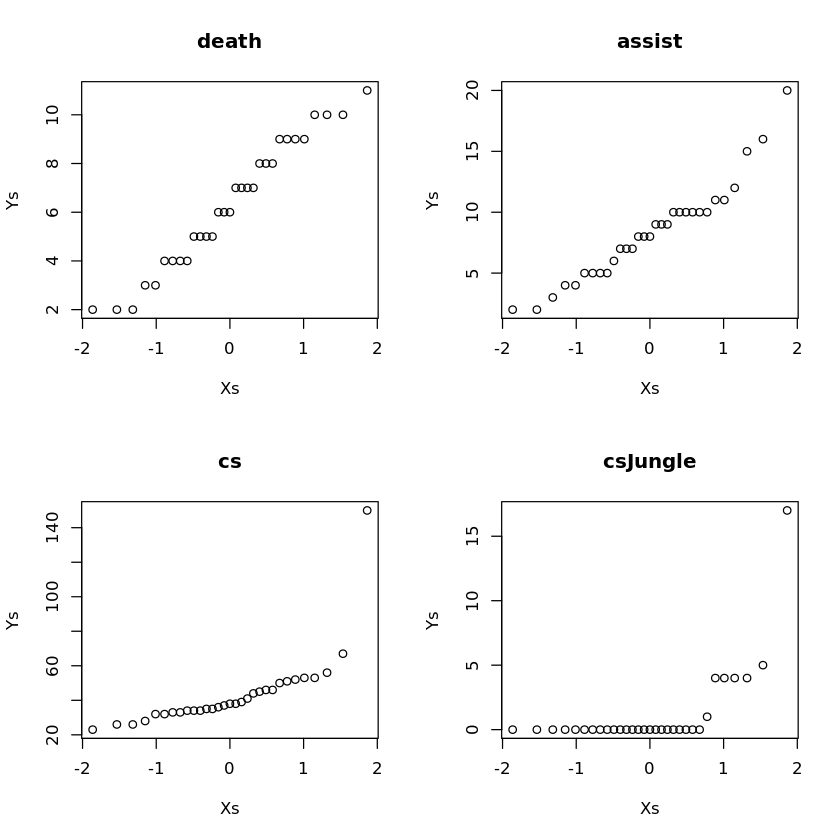

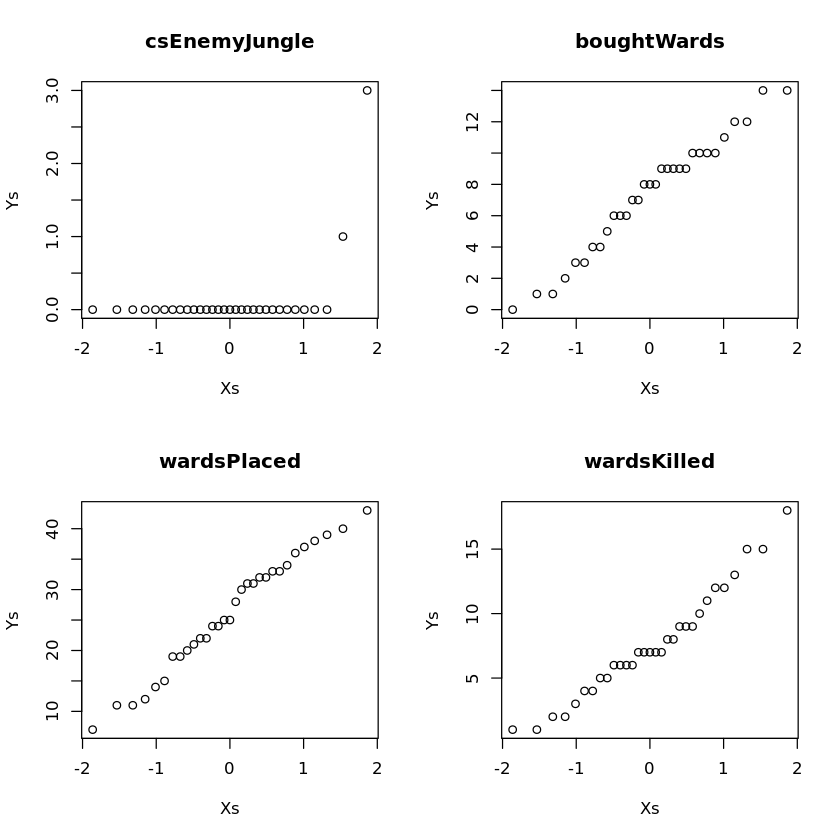

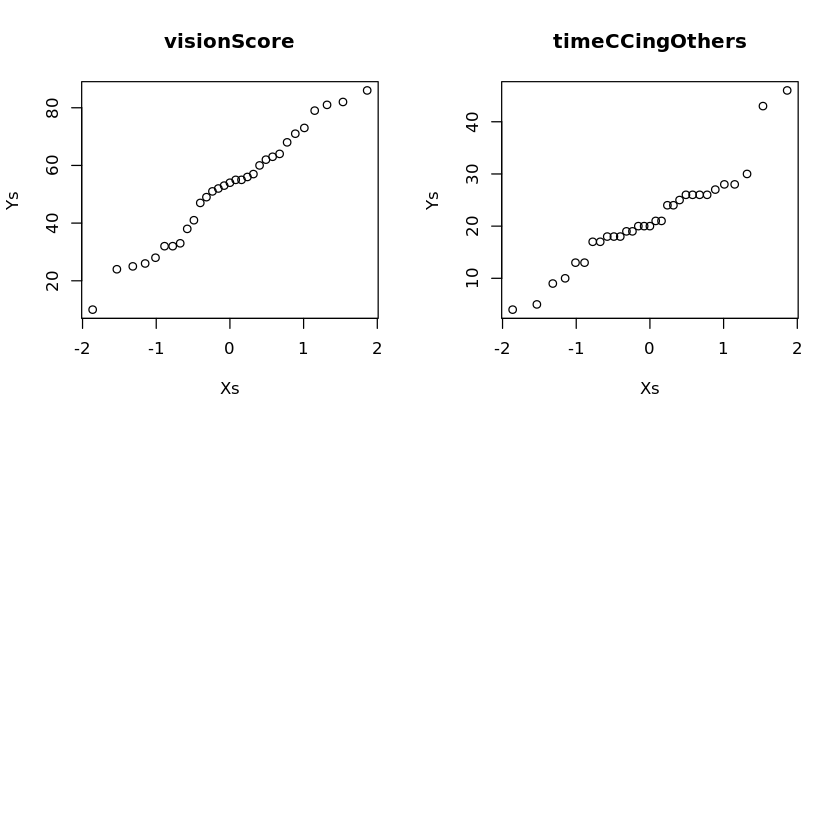

In [91]:
# 정규분포 분위수대조도
par(mfrow=c(2,2))
data.show = data.f3_1[, 4:13]
for(i in 1:ncol(data.show)){
    x = data.show[i]
    Ys = sort(unlist(x))
    Xs = qnorm(seq(0,1, length=length(Ys)+2)[c(-1,-(length(Ys)+2))], mean=0, sd=1)
    plot(Ys~Xs, main = names(x))
}

In [145]:
# Ver2.0 : Clustering
data.main.v2 = data.main
people = list()
for(i in 1:to.summoner){
    people[[i]] = data.main.v2[(20*(i-1)+1) : (20*(i-1)+20), ]
}

In [146]:
people.lane = lapply(people, function(x) {
    f1 = which(x$duration>=1200)
    f2 = which(x$role=="DUO_SUPPORT")
    x$lane[intersect(f1,f2)] = "SUPPORT"
    x[f1,]$lane
})

In [148]:
length(sapply(people.lane, length))

[1] 200

In [95]:
euclidean = function(x, y){
    return(sqrt(sum((x-y)^2)))
}

In [96]:
mag = function(x) sqrt(sum(x^2))

In [97]:
mag(c(3,4))

[1] 5

In [98]:
cos.theta = function(x, y){
    return((x%*%y)[1]/(mag(x)*mag(y)))
}

In [149]:
test.case = c("TOP", "MID", "JUNGLE", "BOTTOM", "SUPPORT")
test.result = sapply(people.lane, function(x) {
    test.people = rep(0, 5)
    for(i in 1:length(test.case)){
        test.people[i] = length(which(x==test.case[i]))
    }
    test.people
})

In [150]:
test.result = data.frame(t(test.result))
names(test.result) = test.case
# test.result

In [165]:
kmeans.lane = kmeans(test.result, 5)
cluster = kmeans.lane$cluster
center = kmeans.lane$centers

In [166]:
kmeans.lane

K-means clustering with 5 clusters of sizes 48, 31, 34, 35, 52

Cluster means:
         TOP       MID     JUNGLE     BOTTOM    SUPPORT
1 10.2500000  1.895833  1.0416667  0.9583333  1.2291667
2  0.6774194  1.419355  0.8387097 11.0967742  0.9354839
3  2.0000000 10.088235  1.3235294  0.6764706  0.8235294
4  0.8857143  1.371429 10.8285714  0.9428571  0.9142857
5  0.6153846  0.750000  1.1538462  1.1153846 11.1923077

Clustering vector:
  [1] 2 1 3 5 5 3 4 1 4 5 3 2 4 5 1 4 1 1 5 5 3 3 5 1 5 1 3 3 3 1 1 3 4 5 2 1 1
 [38] 1 5 5 1 3 5 2 5 1 3 2 1 1 3 1 5 3 5 1 5 2 2 3 2 3 5 1 1 3 5 4 3 5 3 5 5 5
 [75] 3 3 5 1 5 4 3 1 1 5 1 4 4 2 5 3 3 4 1 5 5 4 4 3 4 2 5 1 1 5 5 2 4 4 2 1 5
[112] 1 2 4 5 5 4 1 2 4 3 3 4 1 5 4 4 5 2 1 2 2 3 5 2 2 1 3 1 5 2 2 5 2 3 4 3 5
[149] 3 4 1 3 1 1 2 4 5 4 2 5 5 1 1 1 5 2 4 5 1 5 2 4 1 4 1 4 4 2 1 4 5 2 5 4 3
[186] 1 5 2 4 2 5 4 4 5 3 1 5 1 1 2

Within cluster sum of squares by cluster:
[1] 623.7917 365.0968 492.5588 575.3143 872.2115
 (between_SS / total_SS =  83.5 %)

A

In [167]:
center
center.lane = test.case[apply(center, 1, function(x) which(x == max(x)))]
center.lane

,TOP,MID,JUNGLE,BOTTOM,SUPPORT
1,10.2500000,1.895833,1.0416667,0.9583333,1.2291667
2,0.6774194,1.419355,0.8387097,11.0967742,0.9354839
3,2.0000000,10.088235,1.3235294,0.6764706,0.8235294
4,0.8857143,1.371429,10.8285714,0.9428571,0.9142857
5,0.6153846,0.750000,1.1538462,1.1153846,11.1923077


[1] "TOP"     "BOTTOM"  "MID"     "JUNGLE"  "SUPPORT"

In [168]:
bot.index = which(center.lane=="BOTTOM")
bot = test.result[cluster==bot.index,] # BOTTOM
bot.center = center[bot.index,]
bot.distance = apply(t(bot), 2, function(x) {
    euclidean(x, bot.center)
})
bot$distance = bot.distance
bot$index = bot.index

In [169]:
mid.index = which(center.lane=="MID")
mid = test.result[cluster==mid.index,] # MID
mid.center = center[mid.index,]
mid.distance = apply(t(mid), 2, function(x) {
    euclidean(x, mid.center)
})
mid$distance = mid.distance
mid$index = mid.index

In [170]:
top.index = which(center.lane=="TOP")
top = test.result[cluster==top.index,] # TOP
top.center = center[top.index,]
top.distance = apply(t(top), 2, function(x) {
    euclidean(x, top.center)
})
top$distance = top.distance
top$index = top.index

In [171]:
jun.index = which(center.lane=="JUNGLE")
jun = test.result[cluster==jun.index,] # JUNGLE
jun.center = center[jun.index,]
jun.distance = apply(t(jun), 2, function(x) {
    euclidean(x, jun.center)
})
jun$distance = jun.distance
jun$index = jun.index

In [172]:
sup.index = which(center.lane=="SUPPORT")
sup = test.result[cluster==sup.index,] # SUPPORT
sup.center = center[sup.index,]
sup.distance = apply(t(sup), 2, function(x) {
    euclidean(x, sup.center)
})
sup$distance = sup.distance
sup$index = sup.index

In [173]:
bot.order = bot[order(bot.distance),]
mid.order = mid[order(mid.distance),]
top.order = top[order(top.distance),]
jun.order = jun[order(jun.distance),]
sup.order = sup[order(sup.distance),]

In [174]:
colors = c(
    "red",
    "orange",
    "hotpink",
    "green",
    "blue"
)

In [175]:
for(lane in list(bot, mid, top, jun, sup)) print(center[lane$index[1],])

       TOP        MID     JUNGLE     BOTTOM    SUPPORT 
 0.6774194  1.4193548  0.8387097 11.0967742  0.9354839 
       TOP        MID     JUNGLE     BOTTOM    SUPPORT 
 2.0000000 10.0882353  1.3235294  0.6764706  0.8235294 
       TOP        MID     JUNGLE     BOTTOM    SUPPORT 
10.2500000  1.8958333  1.0416667  0.9583333  1.2291667 
       TOP        MID     JUNGLE     BOTTOM    SUPPORT 
 0.8857143  1.3714286 10.8285714  0.9428571  0.9142857 
       TOP        MID     JUNGLE     BOTTOM    SUPPORT 
 0.6153846  0.7500000  1.1538462  1.1153846 11.1923077 


Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter objec

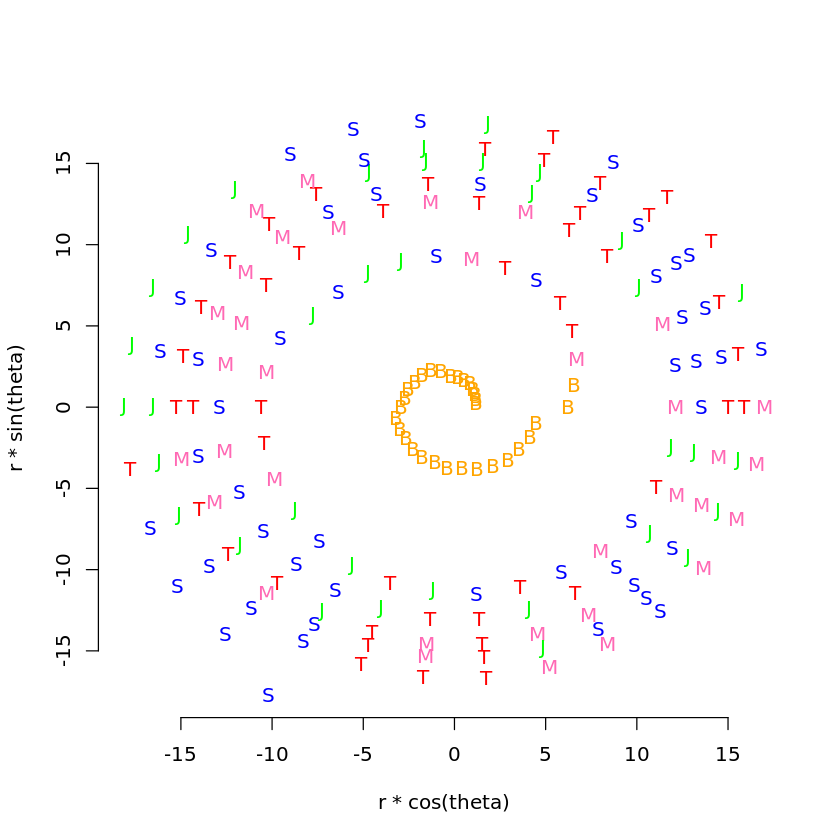

Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”


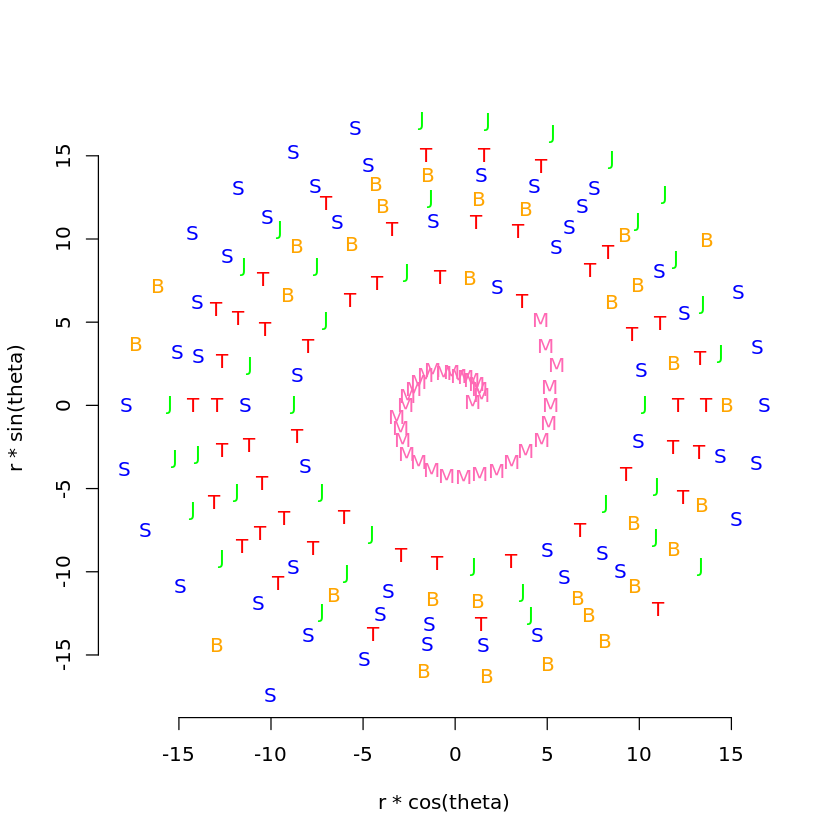

Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”


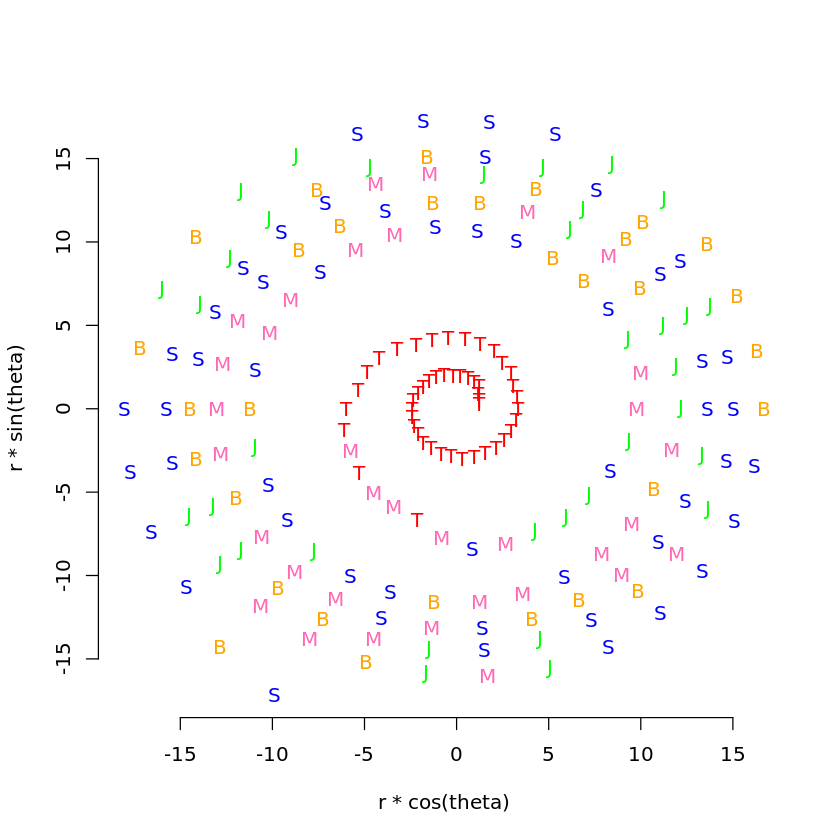

Warning message in r * cos(theta):
“longer object length is not a multiple of shorter object length”
Warning message in r * sin(theta):
“longer object length is not a multiple of shorter object length”


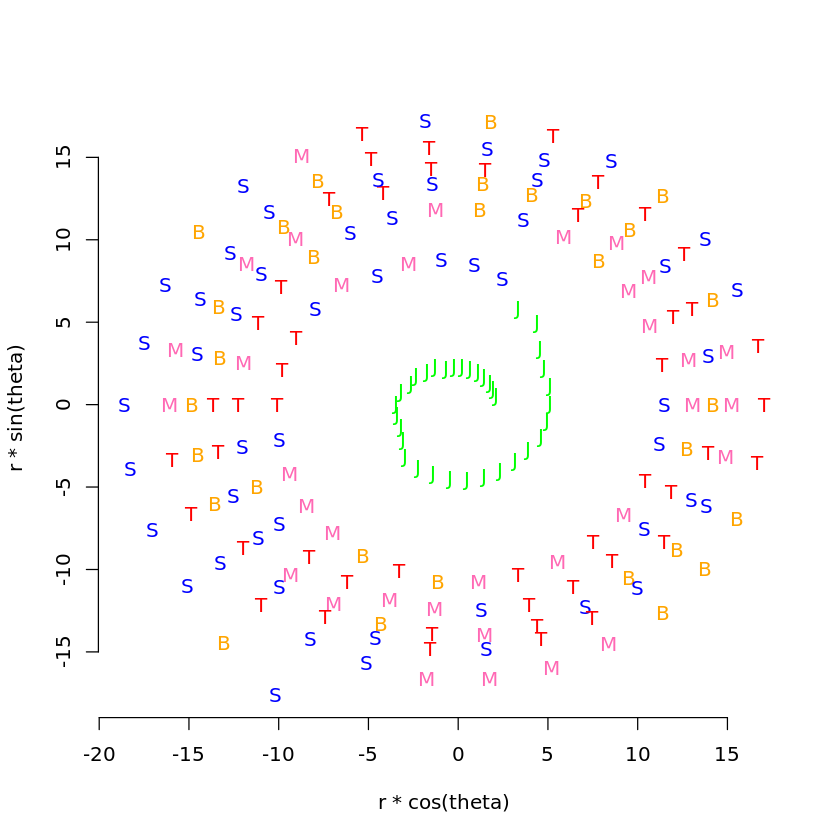

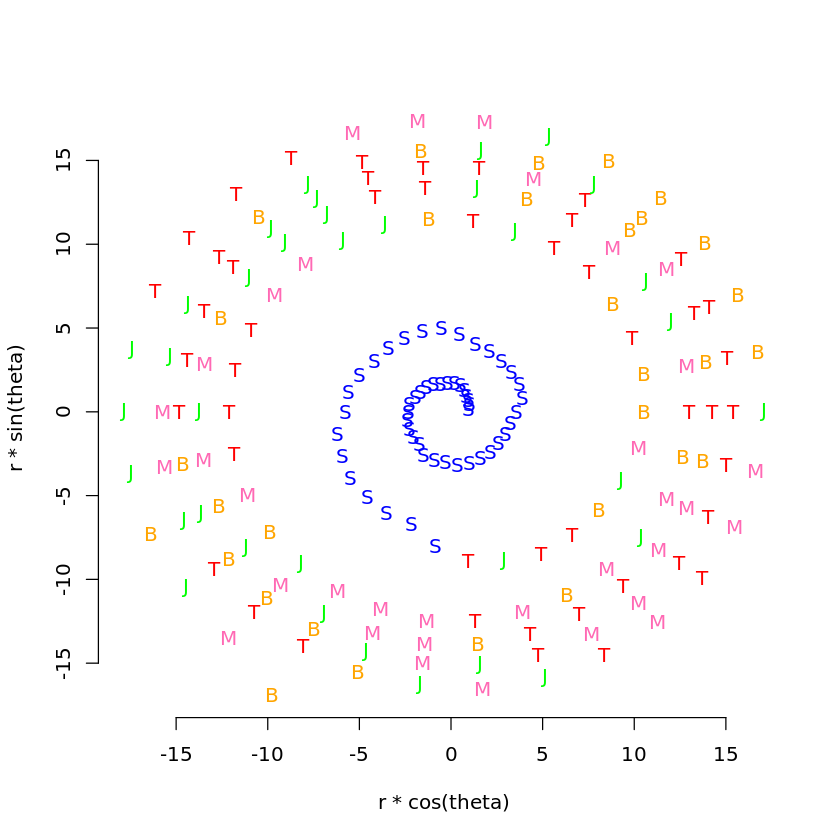

In [176]:
a = rbind(bot, mid, top, jun, sup)
iterator = 1
for(lane in list(bot, mid, top, jun, sup)){
    a.center = center[lane$index[1],] # lane.center
    a.distance = apply(t(a[,-(6:7)]), 2, function(x) {
        euclidean(x, a.center)
    })
    a$distance = a.distance
    a.order = a[order(a.distance),]

    r = a.order$distance
    theta = runif(length(r), min=0, max=(2*pi))
    theta = seq(0,2*pi, by=2*pi/30)[-1]

    plot(x=r*cos(theta), y=r*sin(theta), col=colors[a.order$index],
         pch=center.lane[a.order$index], 
         frame=F)

    # 1. Open Jpeg File
    jpeg(paste0("rplot",iterator,".jpg"), width=8,
    height=8,
    units="in",
    res=500)
    # 2. Create the plot
    plot(x=r*cos(theta), y=r*sin(theta), col=colors[a.order$index],
         pch=center.lane[a.order$index], 
         frame=F)
    # 3. Close the file
    dev.off()
    
    assign("iterator", iterator+1, envir = .GlobalEnv)
}


In [177]:
# default
options(repr.plot.width=7, repr.plot.height=7)


In [179]:
usado = list()
for(i in 1:4){
    for(j in (i+1):5){
        result = euclidean(center[i,], center[j,])
        cat(center.lane[i], center.lane[j], ":", result, '\n')
        usado[[paste(i,j)]] = result
    }
}

TOP BOTTOM : 13.95624 
TOP MID : 11.64051 
TOP JUNGLE : 13.55905 
TOP SUPPORT : 13.90828 
BOTTOM MID : 13.62824 
BOTTOM JUNGLE : 14.24589 
BOTTOM SUPPORT : 14.33115 
MID JUNGLE : 12.94795 
MID SUPPORT : 14.03042 
JUNGLE SUPPORT : 14.13248 


In [180]:
# 코사인
sort(data.frame(usado))

X1.3,X3.4,X1.4,X2.3,X1.5,X1.2,X3.5,X4.5,X2.4,X2.5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.64051,12.94795,13.55905,13.62824,13.90828,13.95624,14.03042,14.13248,14.24589,14.33115


In [181]:
# 유클리디안: 주 라인이 있으니 이게 더 나을 듯
sort(data.frame(usado))

X1.3,X3.4,X1.4,X2.3,X1.5,X1.2,X3.5,X4.5,X2.4,X2.5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11.64051,12.94795,13.55905,13.62824,13.90828,13.95624,14.03042,14.13248,14.24589,14.33115


In [182]:
write(toJSON(data.main), file="fixed_data/data_main.json")
write(toJSON(data.f1), file="fixed_data/data_f1.json")
write(toJSON(data.f2), file="fixed_data/data_f2.json")
write(toJSON(data.f3), file="fixed_data/data_f3.json")
write(toJSON(test.result), file="fixed_data/data_lane.json")

In [183]:
# 200 명의 소환사들을 주 라인에 따라 군집화
str(cluster)
head(test.case[cluster])

 int [1:200] 2 1 3 5 5 3 4 1 4 5 ...


[1] "MID"     "TOP"     "JUNGLE"  "SUPPORT" "SUPPORT" "JUNGLE"

In [184]:
# 승률에 따라 그래프를 그리고 주 라인에 따라 색깔 부여
# X축 : 정렬(승률, 오름차순)된 소환사의 순서
# Y축 : 승률
# 예상: 계단형 그래프가 그려질 것
people.win = lapply(people, function(x) {
    x$win
})

In [185]:
people.winrate = data.frame(no= 1:to.summoner,winrate = sapply(people.win, mean))

In [186]:
people.winrate.order = order(people.winrate$winrate)

In [187]:
X = 1:to.summoner
Y = people.winrate$winrate[people.winrate.order] + rnorm(to.summoner)*0.05
colors = c(
    "red",
    "orange",
    "yellow",
    "green",
    "blue"
)

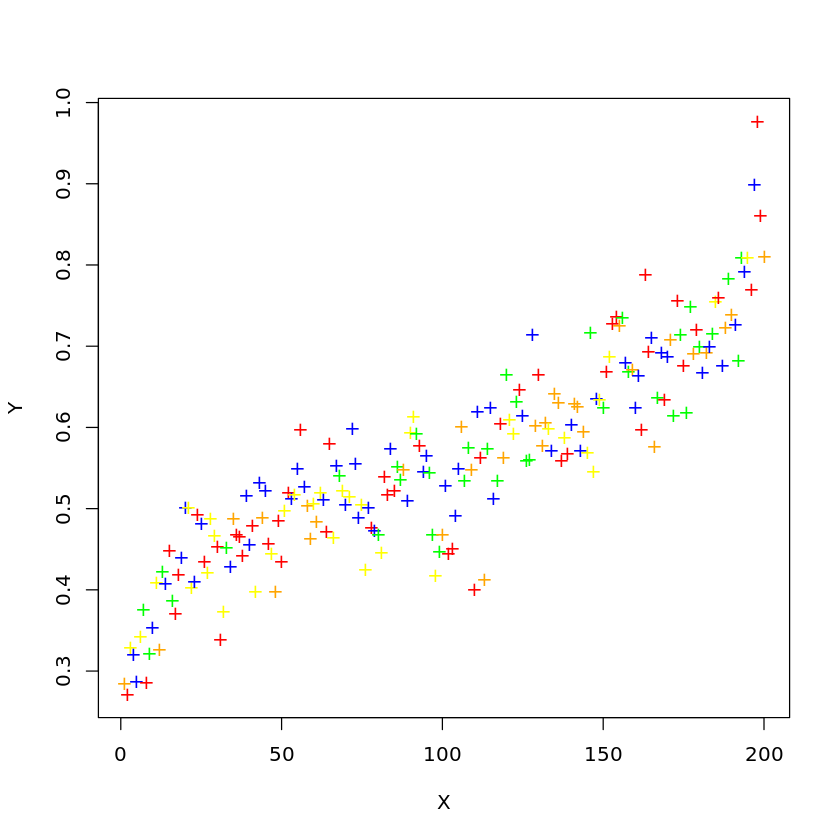

In [188]:
plot(Y~X, data=people.winrate, col=colors[cluster], pch="+")

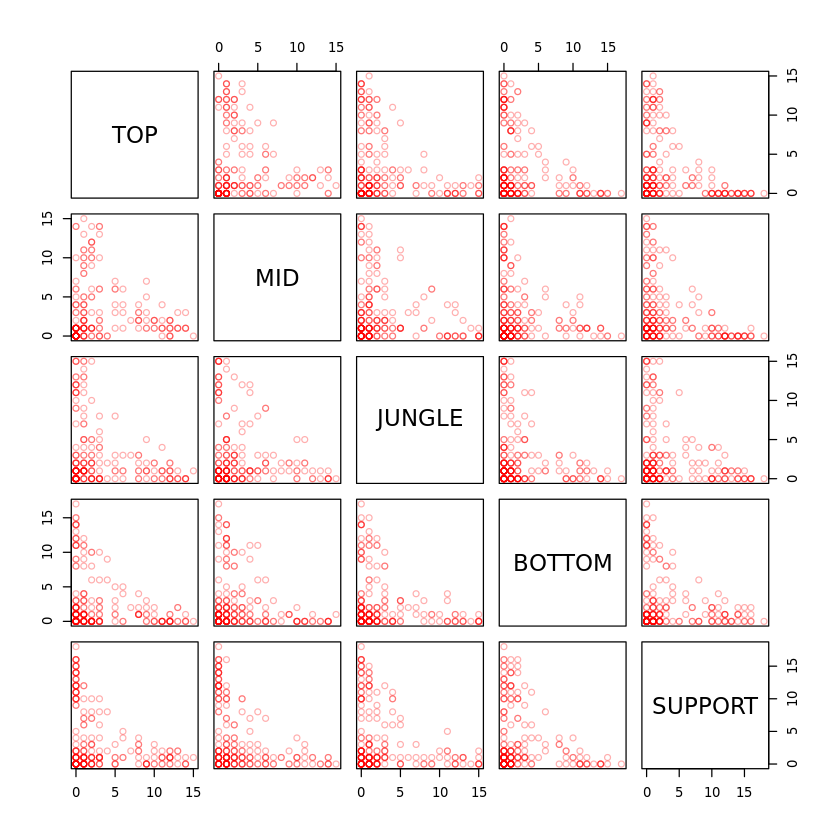

In [189]:
plot(a[,1:5], col="#ff000050")

In [190]:
acos.get = function(a,b,c){
    return(acos((b**2+c**2-a**2)/(2*b*c)))
}

In [191]:
head(a[,1:5])

,TOP,MID,JUNGLE,BOTTOM,SUPPORT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,15,1
12,2,5,1,6,3
35,1,1,0,9,1
44,1,1,1,12,0
48,4,0,0,9,2
58,0,5,1,11,0


png 
  2

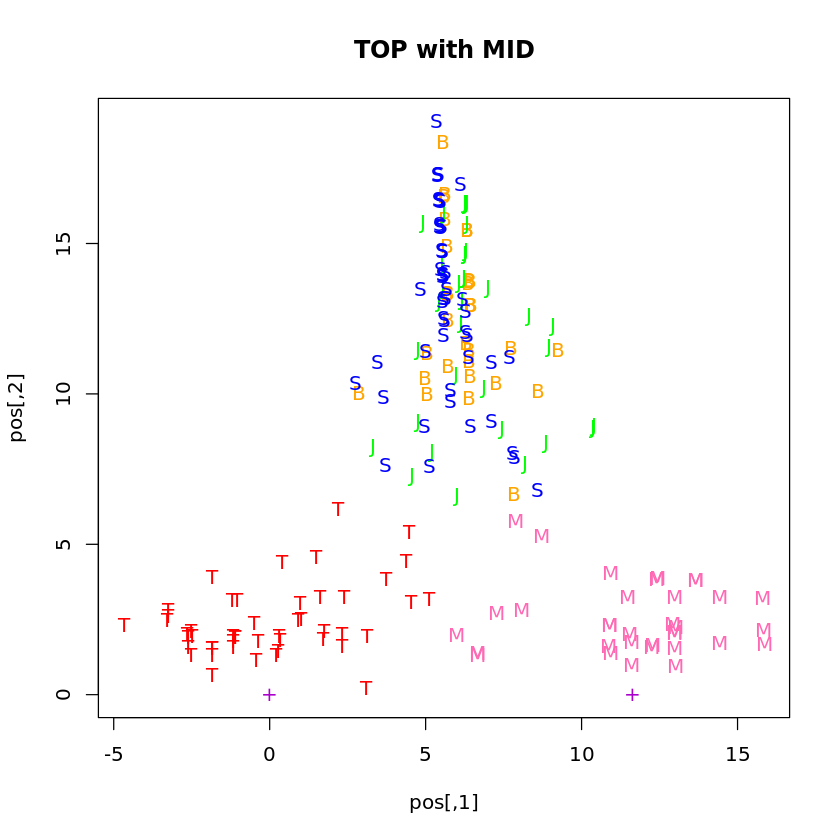

In [196]:
### targetA과 targetB 사이의 유저 분포
targetA = top.center
targetB = mid.center

d_A = apply(t(a[,1:5]), 2, function(x) {
    euclidean(x, targetA)
})
d_B = apply(t(a[,1:5]), 2, function(x) {
    euclidean(x, targetB)
})
d = euclidean(targetA, targetB)

# 좌표계
e1 = c(1, 0)
e2 = c(0, 1)

# 중심좌표
c1 = c(0, 0) # targetA
c2 = c(d, 0) # targetB

# 대칭축
axisX = d/2
axisY = 0

# 삼각형 그리기
pos = matrix(0, nrow=to.summoner+2, ncol=2) # 중심점 2개 추가
pos[nrow(pos)-1, ] = c1
pos[nrow(pos), ] = c2

colors = c(
    "red",
    "orange",
    "hotpink",
    "green",
    "blue"
)
colors[nrow(pos)-1] = "#aa00cc" # A
colors[nrow(pos)] = "#aa00cc" # B
center.lane[nrow(pos)-1] = "+"
center.lane[nrow(pos)] = "+"
for(i in 1:to.summoner){
    r = d_A[i]
    theta = acos.get(d_B[i], d_A[i], d)
    
#     type = floor(runif(1,1,5))
#     d2 = abs(axisX -r*cos(theta))
#     if(type == 1){
#         pos[i, ] = c(axisX + d2, r*sin(theta))
#     }else if(type == 2){
#         pos[i, ] = c(axisX - d2, r*sin(theta))
#     }else if(type == 3){
#         pos[i, ] = c(axisX + d2, -r*sin(theta))
#     }else if(type == 4){
#         pos[i, ] = c(axisX - d2, -r*sin(theta))        
#     }
    pos[i, ] = c(r*cos(theta), r*sin(theta))
}
# my setting
index = c(a$index, nrow(pos)-1, nrow(pos))
plot(pos, main=paste("TOP with MID"), col=colors[index], pch=center.lane[index])

    
# 1. Open Jpeg File
    jpeg(
    filename=paste0("lolololololol",".jpg"),
    width=8,
    height=8,
    units="in",
    res=500)
# 2. Create the plot
plot(pos, main=paste("TOP with MID"), col=colors[index], pch=center.lane[index], frame=F)
# 3. Close the file
dev.off()

In [140]:
theta

190 
1.209027

In [128]:
jun.center
jun.order

TOP       MID    JUNGLE    BOTTOM   SUPPORT 
0.6176471 0.7647059 5.0882353 0.5882353 0.7058824

,TOP,MID,JUNGLE,BOTTOM,SUPPORT,distance,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
14,0,0,4,1,1,1.551314,4
192,0,0,6,0,0,1.625383,4
159,0,0,5,0,2,1.730552,4
183,1,0,5,2,0,1.797249,4
184,0,0,6,2,0,2.070973,4
66,0,1,7,0,0,2.221708,4
191,0,0,7,0,1,2.248029,4
37,2,1,4,0,2,2.274045,4
173,1,1,3,1,0,2.286942,4


[1] 7.683785

[1] 7.683785

0.000000,0.000000
6.196404,0.000000
3.070341,7.043689
0.000000,0.000000
0.000000,0.000000


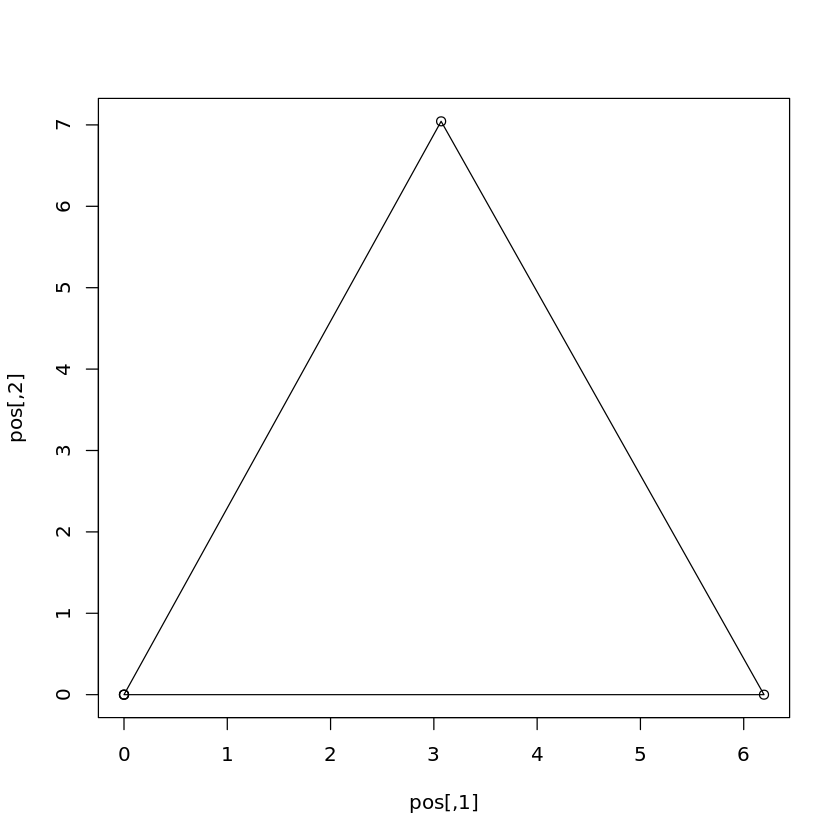

In [129]:
pos = matrix(0, ncol=2, nrow=5)
pos[1,] = c(0, 0)
r1 = euclidean(top.center, mid.center) # T - M
theta = 0
pos[2,] = c((pos[1, 1] + r1*cos(theta)), (pos[1, 2] + r1*sin(theta)))
r2 = euclidean(top.center, sup.center) # T - S
r3 = euclidean(mid.center, sup.center) # M - S
theta = acos.get(r3,r1,r2)
pos[3,] = c((pos[1, 1] + r2*cos(theta)), (pos[1, 2] + r2*sin(theta)))
# r4 = euclidean(top.center, jun.center) # T - J
# r5 = euclidean(mid.center, jun.center) # M - J
# r6 = euclidean(sup.center, jun.center) # S - J
# theta = acos((r1**2+r2**2-r3**2)/(2*r1*r2))
# pos[3,] = c((pos[1, 1] + r2*cos(theta)), (pos[1, 2] + r2*sin(theta)))
# r4 = euclidean(top.center, jun.center) # T - J
# r5 = euclidean(mid.center, jun.center) # M - J
# r6 = euclidean(sup.center, jun.center) # S - J
# # theta1 = acos((r2**2+r4**2-r6**2)/(2*r2*r4))
# theta = acos((r1**2+r4**2-r5**2)/(2*r1*r4))
# pos[4,] = c((pos[1, 1] + r2*cos(theta)), (pos[1, 2] + r2*sin(theta)))

euclidean(pos[1,],pos[3,])
euclidean(top.center, sup.center)
plot(pos)
lines(pos)
pos

In [264]:
### 버려지는 20분 미만의 게임을 활용할 수 있을까.
# data.main
f1 = which(data.main$lane == "NONE")
f2 = which(data.main$role == "DUO_SUPPORT")
f3 = which(data.main$duration > 1000)
f = intersect(f1,f2)
f = intersect(f2,f3)
# data.main[f, ]
# cData.keys[as.character(data.main[f,]$champion)]
# head(data.main[f, 25:31])
# apply(t(data.main[f, 25:31]), 2, function(x) lapply(iData.items[as.character(x)], function(y) y$name))

# 버리자. 위험인자를 너무 많이 안고 있음.

In [263]:
### 아이템 간의 시너지 가즈아ㅏ
items = data.main.v2[, 25:31]
# head(items)
items.synerge = list()
for(i in 1:to.summoner){    
    sitem = as.character(items[i,])
    for(j in 1:6) {
        for(k in 1:6){
            if(j == k) next
            items.synerge[[sitem[j]]] = c(items.synerge[[sitem[j]]], sitem[k])            
        }
    }
}

In [264]:
items.synerge = lapply(items.synerge, function(x) {
    result = data.frame(table(x))
    result = result[result$x != '0',] # 빈 공간은 제거
#     result = result[order(result$Freq, decreasing=T),] # 많이 관계된 것 별로 정렬인데,, 필요할라나
})
items.synerge['0'] = NULL

write(toJSON(items.synerge), file='fixed_data/items_synerge.json')

In [211]:
### 챔피언 간의 시너지 가즈아ㅏ
champions.game = rep(1:(to.summoner*20), each=10)
champions.team = c()
champions.id = c()
for(i in 1:to.summoner){
    participants = fromJSON(paste0('data/', tier, i, '/match_participants.json'))
    champions.team = c(champions.team, sapply(participants, function(x) {x$teamId}))
    champions.id = c(champions.id, sapply(participants, function(x) {x$championId}))
}
champions = cbind(game = unlist(champions.game), team = unlist(champions.team), id = unlist(champions.id))
champions = data.frame(champions)

In [250]:
champions.synerge = list()

In [251]:
for(game in 1:(to.summoner*20)){
    root = champions[champions$game == game,]
    ta = root[root$team==100, ]
    tb = root[root$team==200, ]
    t = as.character(ta$id)
    for(j in 1:5) {
        for(k in 1:5){
            if(j == k) next
            champions.synerge[[t[j]]] = c(champions.synerge[[t[j]]], t[k])            
        }
    }
    t = as.character(tb$id)
    for(j in 1:5) {
        for(k in 1:5){
            if(j == k) next
            champions.synerge[[t[j]]] = c(champions.synerge[[t[j]]], t[k])            
        }
    }
}

In [253]:
champions.synerge = lapply(champions.synerge, function(x) {
    result = data.frame(table(x))
#     result = result[order(result$Freq, decreasing=T),] # 많이 관계된 것 별로 정렬인데,, 필요할라나
})
write(toJSON(champions.synerge), file='fixed_data/champions_synerge.json')

$<NA>
NULL